In [1]:
#pip install Optuna 

In [2]:
""" A program that detects a creditcardfraud"""

' A program that detects a creditcardfraud'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import pickle
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, f1_score


In [4]:
# def print_evaluations(clf_model, X_train,  X_test, y_test):
#     """
#     Returns Confusion Matrix and relevant metrics for predictions of classifiers.
#     Takes classification model and split data.
#     """
#     clf_model.fit(X_train, y_train)
#     y_pred = clf_model.predict(X_test)
#     print(f'How does model{clf_model} score:')
#     print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 3)}')
#     print(f'The precision of the model is: {round(recall_score(y_test, y_pred), 3)}')
#     print(f'The recall of the model is: {round(recall_score(y_test, y_pred), 3)}')
#     print(f'The f1_score of the model is: {round(f1_score(y_test, y_pred), 3)}')

#     #print confusion matrix
#     ConfusionMatrixDisplay.from_estimator(clf_model, X_test, y_test,)

In [5]:
df1 = pd.read_csv('creditcard.csv')
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#checking for missing values
df1.isnull().sum().max()

0

In [8]:
df1.shape

(284807, 31)

In [9]:
# Normalizing the class column 
df1['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

/Users/Nnamdi2/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


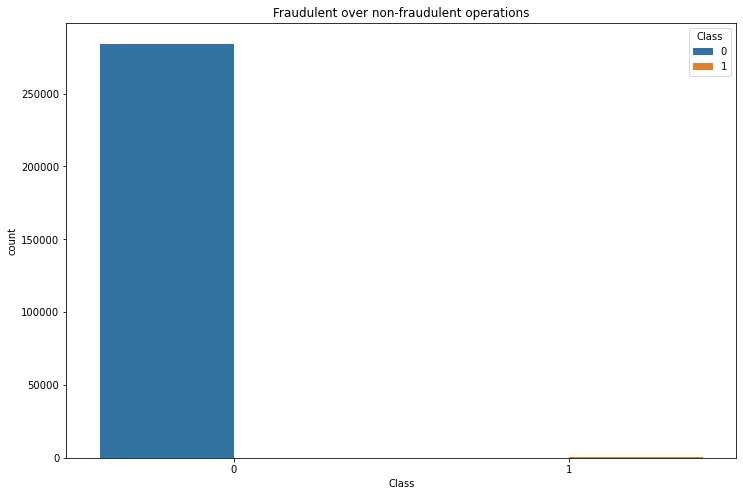

In [10]:
# checking the distribution of the class
plt.figure(figsize=(12,8))
sns.countplot('Class', data=df1, hue='Class');
plt.title('Fraudulent over non-fraudulent operations');



The distribution of fraud and non-fraud is skewed and therefore we will need to do a sub sample where fraud and non-fraud will be in a ratio of 1:1

In [11]:
# we will normalize the values of Time and amount
scaler = StandardScaler()
robust = RobustScaler()
scaled_time = robust.fit_transform(df1['Time'].values.reshape(-1,1))
scaled_amount = robust.fit_transform(df1['Amount'].values.reshape(-1,1))

# we make a deep copy of original df1. to avoid overwrtting our original dataset
df2 = df1.copy()

In [12]:
# inserting the scaled_time and scaled_amount into df2 dataframe
df2.insert(0, 'scaled_time', scaled_time)
df2.insert(1, 'scaled_amount', scaled_amount)
df2_scaled = df2.drop(columns=['Time','Amount']) #droping Time & Amount columns in df2 and assign to df2_scaled
df2_scaled


,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-0.296653,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,1.034963,0.038986,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.034975,0.641096,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,1.034975,-0.167680,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [13]:
# getting X and y before subsampling the dataset
X_df2_scaled = df2_scaled.drop(columns=['Class'], axis=1)
y_df2_scaled = df2_scaled['Class']

In [14]:
X_df2_scaled.shape, y_df2_scaled.shape

((284807, 30), (284807,))

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X_df2_scaled, y_df2_scaled, random_state=48, stratify=y_df2_scaled)

In [16]:
# instatiate the model
df2_scaled_LR = LogisticRegression(class_weight=None,random_state=48, max_iter=1000)

In [17]:
df2_scaled_LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=48)

In [18]:
y_pred_df2_scaled = df2_scaled_LR.predict(X_test)

In [19]:
y_pred_df2_scaled = df2_scaled_LR.predict(X_test)
print(f'How does model{df2_scaled_LR} score:')
print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred_df2_scaled), 3)}')
print(f'The precision of the model is: {round(recall_score(y_test, y_pred_df2_scaled), 3)}')
print(f'The recall of the model is: {round(recall_score(y_test, y_pred_df2_scaled), 3)}')
print(f'The f1_score of the model is: {round(f1_score(y_test, y_pred_df2_scaled), 3)}')

How does modelLogisticRegression(max_iter=1000, random_state=48) score:
The accuracy of the model is: 0.999
The precision of the model is: 0.602
The recall of the model is: 0.602
The f1_score of the model is: 0.708


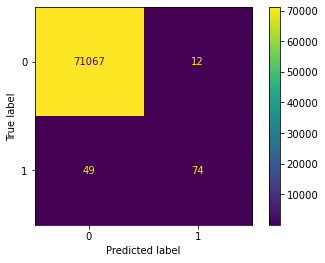

In [20]:
# getting the confusion matrix of the dataset before subsampling
ConfusionMatrixDisplay.from_estimator(df2_scaled_LR, X_test, y_test);

### We will do a Sub Sampling with the aim to get equally distributed fraud vs non-fraud and use it to train our model

In [21]:
df2_scaled = df2_scaled.sample(frac=1, random_state=48) # shuffling the dataframe

df2_scaled_nonfraud = df2_scaled.loc[df2['Class'] == 0][:492] #undersampling nonfraud point randdomly
df2_scaled_fraud = df2_scaled.loc[df1['Class']==1]

# New sample Dataset
df2_distributed = pd.concat([df2_scaled_nonfraud, df2_scaled_fraud]) # join the two dataframe
df3 = df2_distributed.sample(frac=1, random_state=48) # shuffling the dataframe

df3

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
44495,-0.501897,0.248725,1.291938,-0.365279,0.181820,-0.533999,-0.761902,-0.647594,-0.591874,-0.087471,...,0.181931,0.100225,0.215950,-0.004753,0.020242,0.303949,-0.258524,0.044560,0.048908,0
15566,-0.678239,1.089779,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1
197586,0.556797,6.409837,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,...,-0.025862,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,1
206664,0.606422,-0.296793,-1.102492,2.159172,-4.312176,-1.163056,3.300516,2.900514,-0.881430,-1.150740,...,0.322056,-1.112238,0.552558,0.064139,0.503571,-0.209685,0.579692,-0.335457,0.021402,0
150601,0.106322,-0.293440,-3.291125,4.401194,-8.394212,4.453580,-4.790055,-4.240182,-9.219001,1.974030,...,1.490869,2.102343,0.597370,-0.328086,0.445752,0.585281,-0.399005,2.116004,1.050744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185149,0.491618,-0.293440,-3.559974,-2.899425,-1.305873,-1.470462,2.245207,0.673066,0.322093,-0.845403,...,-1.571595,-0.297834,1.947665,0.524413,-0.835343,-0.007887,-0.005072,-1.770856,0.277131,0
106917,-0.170385,-0.293440,1.269996,0.048264,-0.796266,0.049182,1.984723,3.536055,-0.664472,0.900698,...,-0.015657,-0.249133,-0.867404,0.082563,0.953191,0.455126,-0.590904,0.039091,0.027355,0
279432,0.988863,0.139593,1.914230,-0.931704,-1.781664,-1.081994,1.650058,3.930919,-1.134066,1.069908,...,-0.134747,-0.343153,-0.764435,0.362150,0.662478,-0.205530,-1.037663,0.094020,-0.032717,0
229730,0.720568,-0.276392,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,...,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,1


In [22]:
# getting samples for prediction
test_df3 = df3.sample(3)
test_df3

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
248651,0.814577,0.188640,2.263895,-1.554862,-1.020602,-1.804460,-1.013092,0.117439,-1.356219,0.016920,...,-0.360077,-0.146060,0.045127,0.102599,-1.177291,-0.191880,-0.125024,0.020684,-0.062753,0
5986,-0.916517,-0.294557,-1.977207,1.881730,0.855451,-1.911304,0.555537,0.382803,0.522608,0.053901,...,0.904876,-0.515743,-0.400950,-0.179110,-1.194359,-0.050070,0.708500,0.256451,-0.224461,0
153885,0.185728,-0.296793,-6.985267,5.151094,-4.599338,4.534479,0.849054,-0.210701,-4.425230,-5.134525,...,-1.246996,5.453672,-2.056177,-0.280334,0.120771,0.569358,0.145971,0.300193,1.779364,1


In [23]:
# dropping the sample from the df3 dataset
df3.drop(test_df3.index)

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
44495,-0.501897,0.248725,1.291938,-0.365279,0.181820,-0.533999,-0.761902,-0.647594,-0.591874,-0.087471,...,0.181931,0.100225,0.215950,-0.004753,0.020242,0.303949,-0.258524,0.044560,0.048908,0
15566,-0.678239,1.089779,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1
197586,0.556797,6.409837,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,...,-0.025862,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,1
206664,0.606422,-0.296793,-1.102492,2.159172,-4.312176,-1.163056,3.300516,2.900514,-0.881430,-1.150740,...,0.322056,-1.112238,0.552558,0.064139,0.503571,-0.209685,0.579692,-0.335457,0.021402,0
150601,0.106322,-0.293440,-3.291125,4.401194,-8.394212,4.453580,-4.790055,-4.240182,-9.219001,1.974030,...,1.490869,2.102343,0.597370,-0.328086,0.445752,0.585281,-0.399005,2.116004,1.050744,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185149,0.491618,-0.293440,-3.559974,-2.899425,-1.305873,-1.470462,2.245207,0.673066,0.322093,-0.845403,...,-1.571595,-0.297834,1.947665,0.524413,-0.835343,-0.007887,-0.005072,-1.770856,0.277131,0
106917,-0.170385,-0.293440,1.269996,0.048264,-0.796266,0.049182,1.984723,3.536055,-0.664472,0.900698,...,-0.015657,-0.249133,-0.867404,0.082563,0.953191,0.455126,-0.590904,0.039091,0.027355,0
279432,0.988863,0.139593,1.914230,-0.931704,-1.781664,-1.081994,1.650058,3.930919,-1.134066,1.069908,...,-0.134747,-0.343153,-0.764435,0.362150,0.662478,-0.205530,-1.037663,0.094020,-0.032717,0
229730,0.720568,-0.276392,1.894036,1.905806,-3.515730,4.508913,2.044466,-1.420468,1.057480,-0.281157,...,-0.160163,-0.144713,-0.310108,-0.101530,-0.414960,0.376597,0.150778,-0.013712,0.048084,1


In [24]:
# save the sample as a csv file to use for model test
test_df4 = test_df3.drop(columns='Class')
test_df4.to_csv('sample_test.csv', index=False)

In [25]:
sam = pd.read_csv('sample_test.csv', )
sam

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.814577,0.188640,2.263895,-1.554862,-1.020602,-1.804460,-1.013092,0.117439,-1.356219,0.016920,...,0.401319,-0.360077,-0.146060,0.045127,0.102599,-1.177291,-0.191880,-0.125024,0.020684,-0.062753
1,-0.916517,-0.294557,-1.977207,1.881730,0.855451,-1.911304,0.555537,0.382803,0.522608,0.053901,...,-0.695927,0.904876,-0.515743,-0.400950,-0.179110,-1.194359,-0.050070,0.708500,0.256451,-0.224461
2,0.185728,-0.296793,-6.985267,5.151094,-4.599338,4.534479,0.849054,-0.210701,-4.425230,-5.134525,...,-1.375518,-1.246996,5.453672,-2.056177,-0.280334,0.120771,0.569358,0.145971,0.300193,1.779364


/Users/Nnamdi2/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


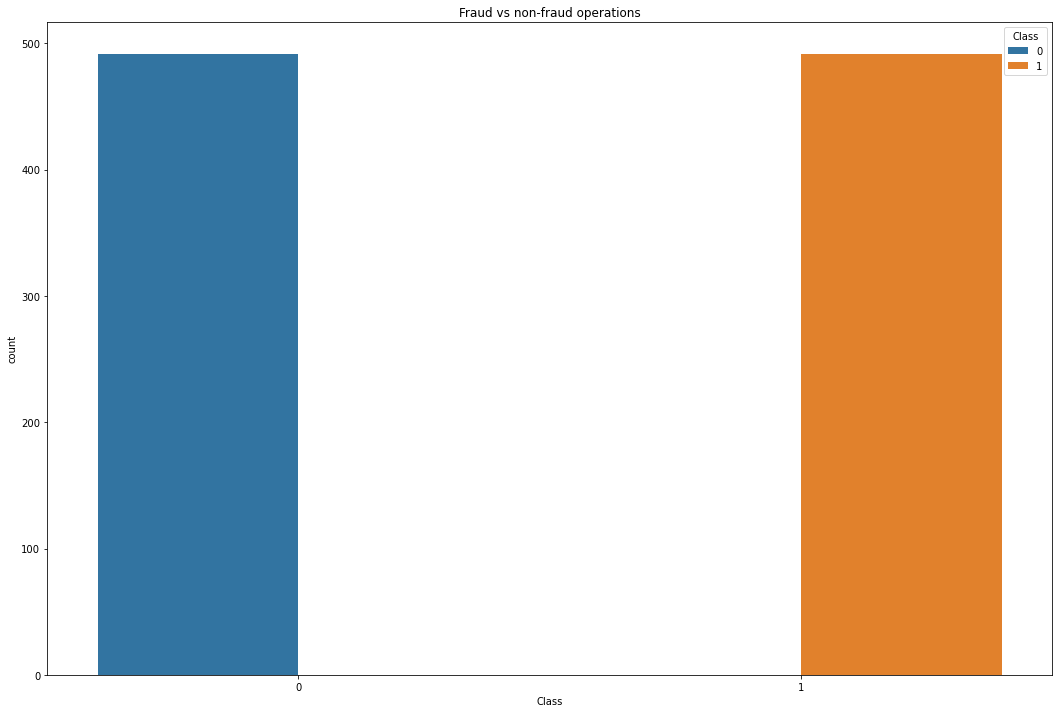

In [26]:
# checking the distribution of the class after balancing the data
plt.figure(figsize=(18,12))
sns.countplot('Class', data=df3, hue='Class');
plt.title('Fraud vs non-fraud operations');

### Split to trian and test dataset

In [27]:

X = df3.drop(columns=['Class'], axis=1)
y = df3['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20) #stratify =y)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((738, 30), (246, 30), (738,), (246,))

### Building the Model

 - the weighting can **penalize the model less** for **errors made on examples from the majority class** and penalize the model **more for errors made on examples from the minority class**.
    - a **larger weight** value results in a **larger error calculation**, and in turn, **more update** to the model **coefficients** (and vice versa)

In [30]:
#
weight_counter = {0:1, 1:100}


In [31]:
#Instantiating the model
LogReg_clf = LogisticRegression( class_weight=weight_counter, random_state=42, max_iter=10000)


In [32]:
LogReg_clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 100}, max_iter=10000, random_state=42)

In [33]:
y_pred = LogReg_clf.predict(X_test)

In [34]:
y_pred = LogReg_clf.predict(X_test)
print(f'How does model{LogReg_clf} score:')
print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 3)}')
print(f'The precision of the model is: {round(recall_score(y_test, y_pred), 3)}')
print(f'The recall of the model is: {round(recall_score(y_test, y_pred), 3)}')
print(f'The f1_score of the model is: {round(f1_score(y_test, y_pred), 3)}')


How does modelLogisticRegression(class_weight={0: 1, 1: 100}, max_iter=10000, random_state=42) score:
The accuracy of the model is: 0.805
The precision of the model is: 0.967
The recall of the model is: 0.967
The f1_score of the model is: 0.832


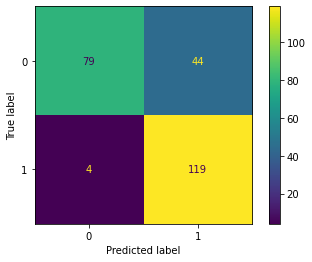

In [35]:
# #print confusion matrix
ConfusionMatrixDisplay.from_estimator(LogReg_clf, X_test, y_test,);

### Cross validation and Hyperparameter optimization.

In [36]:
tuned_LogReg_clf = LogisticRegression(penalty = "l1", C = 0.14121820668347934, solver = 'liblinear')

In [37]:
tuned_LogReg_clf.fit(X_train, y_train)

LogisticRegression(C=0.14121820668347934, penalty='l1', solver='liblinear')

In [38]:
LR_roc_pred = cross_val_predict(tuned_LogReg_clf, X_train, y_train, cv=5,method="decision_function")

print(f' Logistic Regression ROC score: {roc_auc_score(y_train, LR_roc_pred)}')                             

 Logistic Regression ROC score: 0.9771373594494754


In [39]:
# prediction after tuning and cross valiadation
y_pred = tuned_LogReg_clf.predict(X_test)
print(f'How does model{tuned_LogReg_clf} score:')
print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 3)}')
print(f'The precision of the model is: {round(recall_score(y_test, y_pred), 3)}')
print(f'The recall of the model is: {round(recall_score(y_test, y_pred), 3)}')
print(f'The f1_score of the model is: {round(f1_score(y_test, y_pred), 3)}')


How does modelLogisticRegression(C=0.14121820668347934, penalty='l1', solver='liblinear') score:
The accuracy of the model is: 0.947
The precision of the model is: 0.919
The recall of the model is: 0.919
The f1_score of the model is: 0.946


In [40]:
false_positive_rate_LR, true_positive_rate_LR, threshold_LR = roc_curve(y_train, LR_roc_pred)

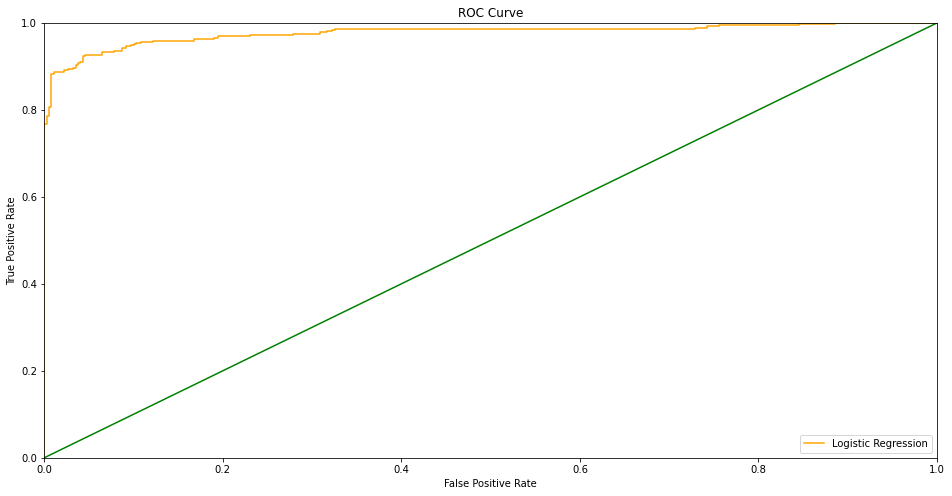

In [41]:
plt.figure(figsize=(16,8))
plt.plot(false_positive_rate_LR,true_positive_rate_LR,label="Logistic Regression",color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot((0,1),(0,1),color="green")
plt.title("ROC Curve")
plt.legend()
plt.show()

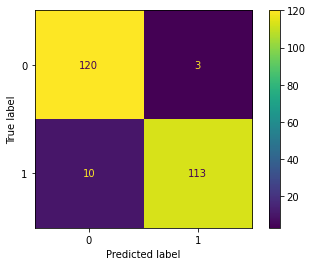

In [42]:
# confusionMAtrix after cross validation
ConfusionMatrixDisplay.from_estimator(tuned_LogReg_clf, X_test, y_test,);

In [43]:
def make_predictions(X_test, tuned_LogReg_clf):
    """Takes a fitted logisticRegression classifier and returns predictions (hard and soft)."""
    X_test = X_test 
    prediction = tuned_LogReg_clf.predict(X_test) # 'hard'-predictions
    probs = tuned_LogReg_clf.predict_proba(X_test) # 'soft'-predictions
    return prediction, probs

In [44]:
#call make_prediction to make prediction on sample data
pred1= make_predictions(
    X_test = sam,
    tuned_LogReg_clf =  tuned_LogReg_clf
)

In [45]:
pred1 

(array([0, 0, 1]),
 array([[9.73034882e-01, 2.69651180e-02],
        [9.67241801e-01, 3.27581994e-02],
        [1.62132491e-05, 9.99983787e-01]]))

In [46]:
with open('./cc_fraud_model.pkl', 'wb') as file:
    pickle.dump(tuned_LogReg_clf, file)

In [47]:
with open('./cc_fraud_model.pkl', 'rb') as file:
    model=pickle.load(file)

In [48]:
model

LogisticRegression(C=0.14121820668347934, penalty='l1', solver='liblinear')